In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, t

#### Background :  A health educator at a small college wants to determine whether the exercise habits of male students in the college are similar to the exercise habits of male college students in general. The educator chooses a random sample of 20 male students and records the time they spend exercising in a typical week. Do the data provide evidence that the mean time male students in the college spend exercising in a typical week differs from the mean time for male college students in general (which is 8 hours)?

In [3]:
DATA_DIR = "../Datasets/"

In [4]:
data = pd.read_excel(os.path.join(DATA_DIR, "time.xls"))

In [16]:
data.head()

,time1,time2,time3,time4
0,6,17,15,12
1,14,12,9,20
2,12,14,7,5
3,9,10,11,1
4,10,17,13,30


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
time1    20 non-null int64
time2    20 non-null int64
time3    20 non-null int64
time4    20 non-null int64
dtypes: int64(4)
memory usage: 720.0 bytes


In [19]:
data.describe()

,time1,time2,time3,time4
count,20.00000,20.00000,20.0000,20.000000
mean,9.75000,10.80000,10.1500,8.400000
std,3.12671,5.99649,2.5808,7.996052
min,4.00000,0.00000,5.0000,0.000000
25%,8.00000,6.75000,8.0000,3.000000
50%,9.50000,12.00000,10.0000,5.000000
75%,12.00000,15.25000,12.2500,12.250000
max,16.00000,20.00000,15.0000,30.000000


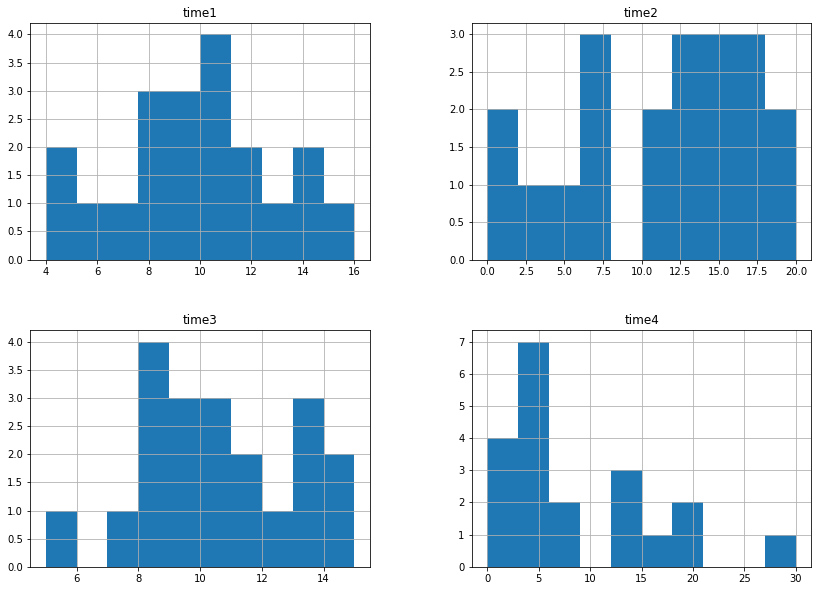

In [15]:
data.hist(figsize=(14, 10))
plt.show()

#### For all the samples the sample size is 20 (less than 30) and we do not know if the variable of interest (time here) varies normally or not, so we can not be certain here if the Central Limit Theorem applies. But here we have the raw data, so we can use the histograms to get an idea about the shape and see if the distribution is not extremely skewed and does not have extreme outliers. If that's the case then we can proceed by assuming that the population varies normally and we will put this disclaimer along with the result.

#### Observations : 
Sample 1, Sample 2, Sample 3 - Distribution seems normal with no outliers. We can proceed with the test assuming that population varies normally.
Sample 4 - Distribution is skewed and has outliers. So we can't proceed with the test.

#### PROBLEM 2 : 
For n = 4, we know that the result x-bar = 550 is not significant. Starting with n = 5 (and going up), create and fill in a table where the column headings are "n," "z (test statistic)," "p-value," and "significant at the 0.05 level (yes/no)." Stop after the first time your result becomes significant at the 0.05 significance level.

In [20]:
def get_prob_from_z_score(z):
    return norm.cdf(z)

In [23]:
p_value = 1
n = 4
x_bar = 550
mu_o = 500
sd = 100

while p_value > 0.05:
    n += 1
    z_score = (x_bar - mu_o) / (sd / np.sqrt(n))
    p_value = 1 - get_prob_from_z_score(z_score)
    print(n)
    print(z_score)
    print(p_value)
    print("-" * 20)

5
1.118033988749895
0.13177623864148635
--------------------
6
1.224744871391589
0.11033568095992341
--------------------
7
1.3228756555322954
0.09293836618293794
--------------------
8
1.4142135623730954
0.0786496035251425
--------------------
9
1.5
0.06680720126885809
--------------------
10
1.5811388300841898
0.056923149003329065
--------------------
11
1.6583123951777
0.04862721421950167
--------------------


#### SOLUTION 2 : 11 is the minimum sample size for the result to become statistically significant. 

#### PROBLEM 3 : 

#### Background:

The length of human pregnancy is known to have a mean of 266 days and a standard deviation of 16 days. Based on records from a large women's hospital, a random sample of 25 women who were smoking and/or drinking alcohol during their pregnancy and their pregnancy lengths are recorded in the datafile linked below. Do the data provide enough evidence to support the (well-known) fact that women who smoke and/or drink alcohol during their pregnancy have shorter pregnancies than women in general (in other words, are more likely to have premature labor)?

#### Hypothesis
Ho : The length of human pregnancy for women who smoke and/or drink alcohol during their pregnancy have a mean of 266 days; mu = 266
Ha: The length of human pregnancy  for women who smoke and/or drink alcohol during their pregnancy have a mean less than 266 days; mu < 266

In [24]:
data = pd.read_excel(os.path.join(DATA_DIR, "pregnancy.xls"))

In [26]:
data.head()

,Pregnancy Length (days)
0,256
1,276
2,252
3,271
4,239


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
Pregnancy Length (days)    25 non-null int64
dtypes: int64(1)
memory usage: 280.0 bytes


In [28]:
data.describe()

,Pregnancy Length (days)
count,25.000000
mean,259.680000
std,20.544099
min,228.000000
25%,246.000000
50%,257.000000
75%,271.000000
max,302.000000


In [35]:
n = len(data)
sample_mean = data.mean()[0]
population_mean = 266
population_std_dev = 16
z_score = (sample_mean - population_mean) / (population_std_dev / np.sqrt(n))

In [36]:
n, sample_mean, population_mean, population_std_dev, z_score 

(25, 259.68, 266, 16, -1.9749999999999979)

In [37]:
p_value = get_prob_from_z_score(z_score)

In [38]:
p_value

0.024134074004724875

#### Solution 3 : 
Since p_value is less than 0.05, so the test statistic is statistically significant.
So, we can reject null hypothesis.
That means, women who smoke and/or drink alcohol during their pregnancy have shorter pregnancies than women in general.

#### PROBLEM 4 :
A group of 75 college students from a certain liberal arts college were randomly sampled and asked about the number of alcoholic drinks they have in a typical week. The file containing the data is linked below. The purpose of this study This link opens in a new tab was to compare the drinking habits of the students at the college to the drinking habits of college students in general. In particular, the dean of students, who initiated this study, would like to check whether the mean number of alcoholic drinks that students at his college have in a typical week differs from the mean of U.S. college students in general, which is estimated to be 4.73.

#### Hypothesis
Ho : The mean number of alcoholic drinks that students at the given college have is 4.73; mu = 4.73
Ha : The mean number of alcoholic drinks that students at the given college have is not 4.73; mu != 4.73

In [4]:
data = pd.read_excel(os.path.join(DATA_DIR, "drinks.xls"))

In [6]:
data.head()

,number of drinks per week
0,3
1,8
2,2
3,15
4,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 1 columns):
number of drinks per week    75 non-null int64
dtypes: int64(1)
memory usage: 680.0 bytes


In [8]:
data.describe()

,number of drinks per week
count,75.000000
mean,3.933333
std,3.775216
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,19.000000


In [17]:
sample_size = len(data)
sample_mean = data.mean()[0]
population_mean = 4.73
sample_std_dev = data.std()[0]

In [18]:
sample_size, sample_mean, population_mean, sample_std_dev

(75, 3.933333333333333, 4.73, 3.775215523947242)

In [19]:
t_score = (sample_mean - population_mean) / (sample_std_dev / np.sqrt(sample_size))

In [20]:
t_score

-1.8275342620975226

In [25]:
p_value = t.cdf(t_score, sample_size)

In [26]:
print("Since the hypothesis is two-sided, p-value will be twice of the one-sided p-value : 2 * p_value", 2 * p_value)

Since the hypothesis is two-sided, p-value will be twice of the one-sided p-value : 2 * p_value 0.07159709294143654


In [27]:
print("The p_value is greater than 0.05 so the result is statistically insignificant. So we can not reject null hypothesis.")

The p_value is greater than 0.05 so the result is statistically insignificant. So we can not reject null hypothesis.
